## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.540222 -1.171678  1.691583 -0.923457  1.581776  0.178196
1  0.552903 -1.267159  1.702837  0.841802 -0.946185  0.096937
2  1.339980 -1.340643  1.472026 -1.659874  0.563435 -1.198608
3 -1.483174  1.135199  0.161987 -1.180580 -1.598641 -2.233706
4  1.274831  0.858156  1.126811 -1.086533 -0.859041 -0.209912


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0307030	total: 46.5ms	remaining: 46.4s
1:	learn: 1.0189900	total: 46.8ms	remaining: 23.4s
2:	learn: 1.0066321	total: 47.2ms	remaining: 15.7s
3:	learn: 0.9941326	total: 47.6ms	remaining: 11.9s
4:	learn: 0.9839069	total: 48ms	remaining: 9.54s
5:	learn: 0.9714287	total: 48.4ms	remaining: 8.01s
6:	learn: 0.9604838	total: 48.8ms	remaining: 6.92s
7:	learn: 0.9505159	total: 49.1ms	remaining: 6.09s
8:	learn: 0.9412461	total: 49.5ms	remaining: 5.45s
9:	learn: 0.9305992	total: 49.8ms	remaining: 4.93s
10:	learn: 0.9195393	total: 50.1ms	remaining: 4.5s
11:	learn: 0.9091863	total: 50.5ms	remaining: 4.15s
12:	learn: 0.8987855	total: 51ms	remaining: 3.87s
13:	learn: 0.8905099	total: 51.5ms	remaining: 3.63s
14:	learn: 0.8822578	total: 51.9ms	remaining: 3.41s
15:	learn: 0.8732808	total: 52.3ms	remaining: 3.21s
16:	learn: 0.8658145	total: 52.7ms	remaining: 3.04s
17:	learn: 0.8571529	total: 53.1ms	remaining: 2.9s
18:	learn: 0.8484967	total: 53.5ms	remaining: 2.76

200:	learn: 0.1753527	total: 121ms	remaining: 481ms
201:	learn: 0.1740399	total: 121ms	remaining: 480ms
202:	learn: 0.1725755	total: 122ms	remaining: 478ms
203:	learn: 0.1711721	total: 122ms	remaining: 477ms
204:	learn: 0.1699890	total: 123ms	remaining: 476ms
205:	learn: 0.1688490	total: 123ms	remaining: 474ms
206:	learn: 0.1671244	total: 123ms	remaining: 473ms
207:	learn: 0.1659789	total: 124ms	remaining: 471ms
208:	learn: 0.1648877	total: 124ms	remaining: 470ms
209:	learn: 0.1637704	total: 124ms	remaining: 468ms
210:	learn: 0.1624870	total: 125ms	remaining: 467ms
211:	learn: 0.1614051	total: 125ms	remaining: 465ms
212:	learn: 0.1600160	total: 126ms	remaining: 464ms
213:	learn: 0.1586573	total: 126ms	remaining: 462ms
214:	learn: 0.1575338	total: 126ms	remaining: 461ms
215:	learn: 0.1564381	total: 127ms	remaining: 459ms
216:	learn: 0.1550730	total: 127ms	remaining: 458ms
217:	learn: 0.1540700	total: 127ms	remaining: 457ms
218:	learn: 0.1527718	total: 128ms	remaining: 455ms
219:	learn: 

487:	learn: 0.0298866	total: 224ms	remaining: 235ms
488:	learn: 0.0297785	total: 225ms	remaining: 235ms
489:	learn: 0.0297417	total: 225ms	remaining: 234ms
490:	learn: 0.0295879	total: 225ms	remaining: 233ms
491:	learn: 0.0295346	total: 226ms	remaining: 233ms
492:	learn: 0.0294793	total: 226ms	remaining: 232ms
493:	learn: 0.0293194	total: 226ms	remaining: 232ms
494:	learn: 0.0291423	total: 227ms	remaining: 231ms
495:	learn: 0.0291074	total: 227ms	remaining: 231ms
496:	learn: 0.0289339	total: 227ms	remaining: 230ms
497:	learn: 0.0288262	total: 228ms	remaining: 230ms
498:	learn: 0.0287079	total: 228ms	remaining: 229ms
499:	learn: 0.0285625	total: 228ms	remaining: 228ms
500:	learn: 0.0285291	total: 229ms	remaining: 228ms
501:	learn: 0.0284962	total: 229ms	remaining: 227ms
502:	learn: 0.0283825	total: 229ms	remaining: 227ms
503:	learn: 0.0282719	total: 230ms	remaining: 226ms
504:	learn: 0.0282402	total: 230ms	remaining: 226ms
505:	learn: 0.0281319	total: 231ms	remaining: 225ms
506:	learn: 

779:	learn: 0.0113198	total: 327ms	remaining: 92.1ms
780:	learn: 0.0113062	total: 327ms	remaining: 91.7ms
781:	learn: 0.0112274	total: 327ms	remaining: 91.3ms
782:	learn: 0.0112043	total: 328ms	remaining: 90.8ms
783:	learn: 0.0111483	total: 328ms	remaining: 90.4ms
784:	learn: 0.0111350	total: 328ms	remaining: 90ms
785:	learn: 0.0111221	total: 329ms	remaining: 89.5ms
786:	learn: 0.0111094	total: 329ms	remaining: 89.1ms
787:	learn: 0.0110329	total: 329ms	remaining: 88.6ms
788:	learn: 0.0110206	total: 330ms	remaining: 88.2ms
789:	learn: 0.0109798	total: 330ms	remaining: 87.7ms
790:	learn: 0.0109110	total: 330ms	remaining: 87.3ms
791:	learn: 0.0108987	total: 331ms	remaining: 86.9ms
792:	learn: 0.0108416	total: 331ms	remaining: 86.4ms
793:	learn: 0.0107874	total: 331ms	remaining: 86ms
794:	learn: 0.0107315	total: 332ms	remaining: 85.6ms
795:	learn: 0.0107198	total: 332ms	remaining: 85.1ms
796:	learn: 0.0106475	total: 332ms	remaining: 84.7ms
797:	learn: 0.0106360	total: 333ms	remaining: 84.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

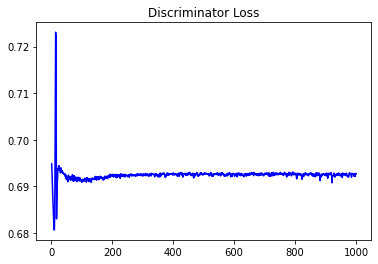

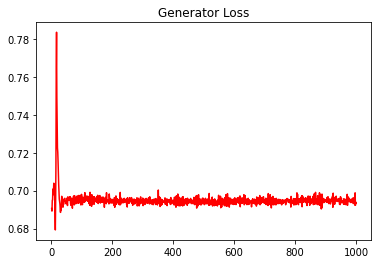

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.014541582387918443


#### Sanity Checks 

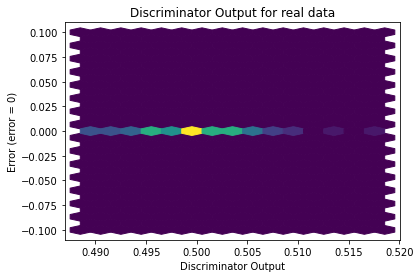

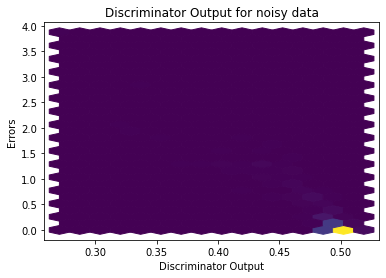

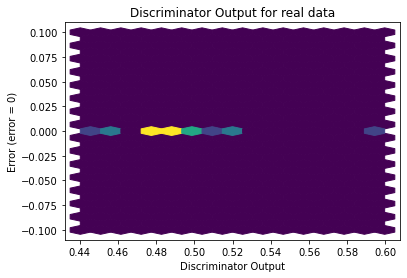

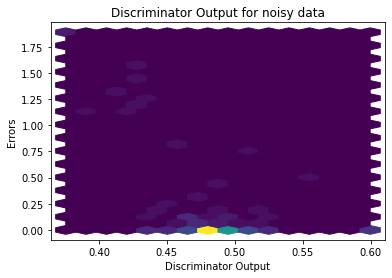

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


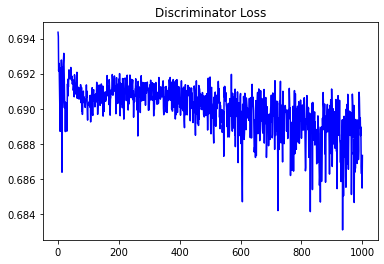

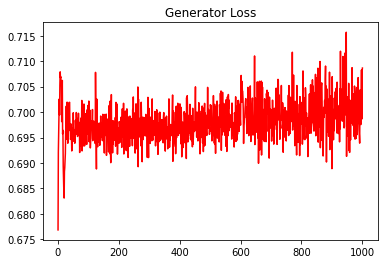

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03662971269687617


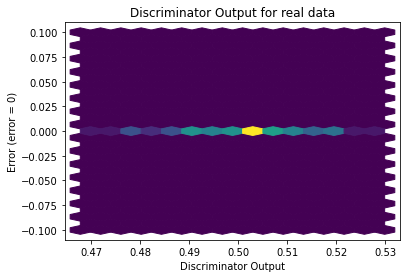

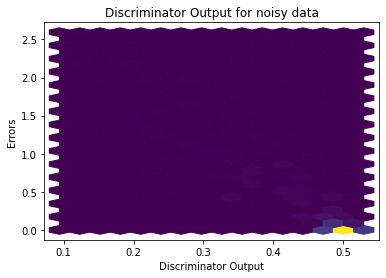

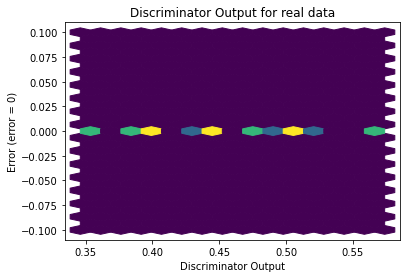

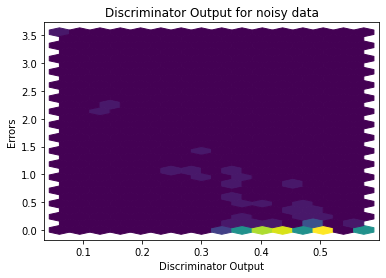

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1117]], device='cuda:0', requires_grad=True)
